In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Univariate Analysis

## Categorical Data

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Frequency table

In [6]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Bar chart

<Axes: xlabel='Pclass'>

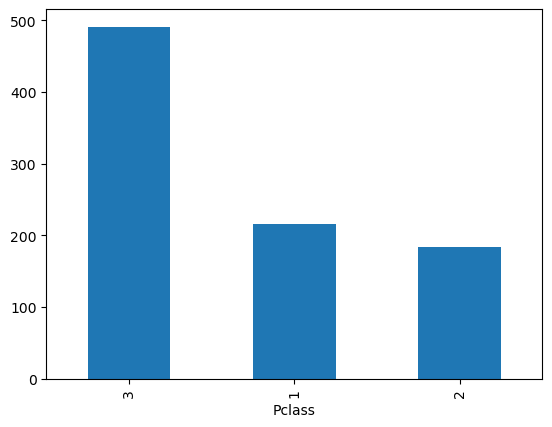

In [7]:
df['Pclass'].value_counts().plot(kind = 'bar')

### Pie chart

<Axes: ylabel='count'>

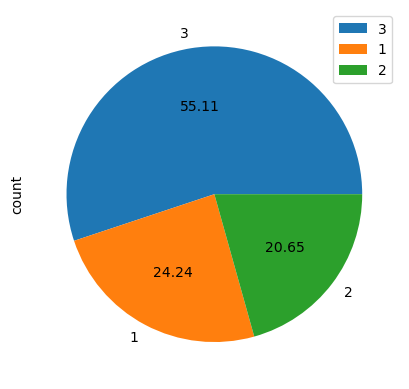

In [10]:
df['Pclass'].value_counts().plot(kind = 'pie', autopct = '%0.2f', legend=True)

### Cumulative Frequency

In [19]:
f=df['Pclass'].value_counts()
f=(f/f.sum())*100

In [20]:
cf = 0
c=[]

In [21]:
for i in f:
    cf = i+cf
    c.append(cf)


In [22]:
c

[55.106621773288445, 79.34904601571269, 100.0]

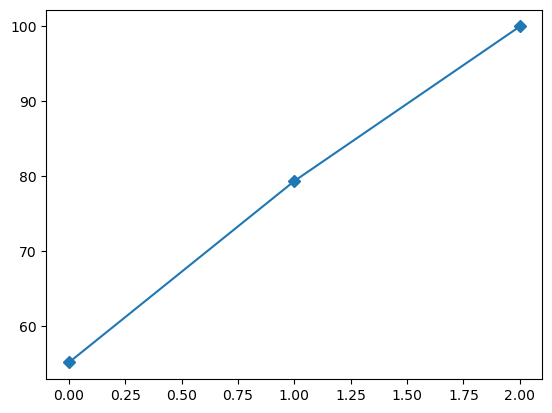

In [23]:
plt.plot(c,marker='D')

## Numerical Data

### Histograms

In [24]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [25]:
d = df['Age'].values

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

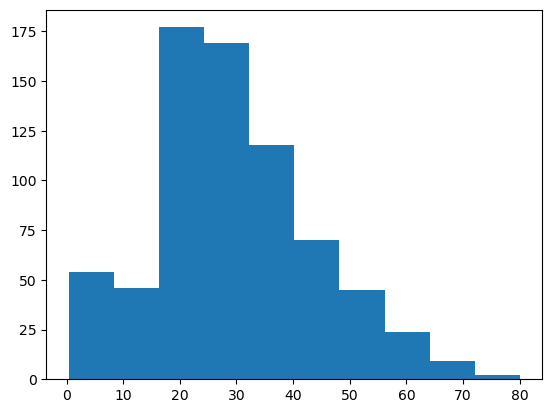

In [26]:
plt.hist(d)

### Boxplot

In [33]:
sns.boxplot('Age', data=df)

TypeError: boxplot() got multiple values for argument 'data'

In [36]:
a = df.dropna(subset=['Age'])
a = a['Age'].values
np.median(a)

28.0

### Kdeplot

<Axes: xlabel='Age', ylabel='Density'>

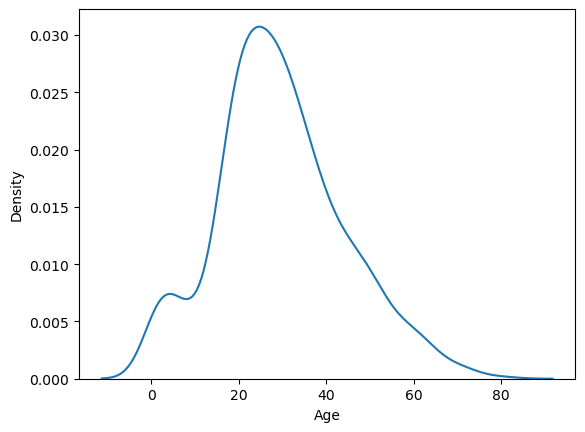

In [37]:
sns.kdeplot(x='Age', data=df)

# Bivariate Analysis

## Categorical vs Numerical

### Box plot

<Axes: xlabel='Pclass', ylabel='Age'>

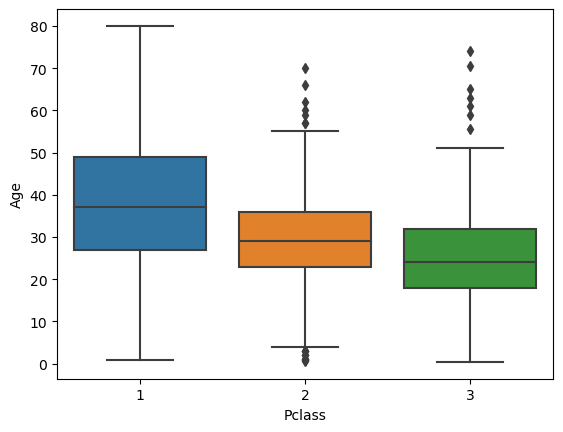

In [38]:
sns.boxplot(x='Pclass', y='Age', data=df)

### Bar plot

<Axes: xlabel='Pclass', ylabel='Age'>

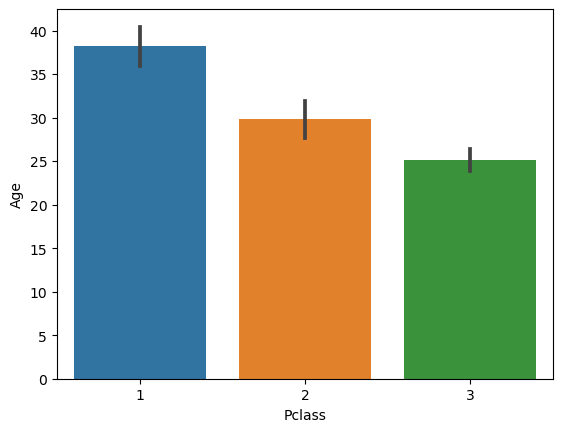

In [39]:
sns.barplot(x='Pclass', y='Age', data=df)

## Numerical vs Numerical

### Scatter Plot

<Axes: xlabel='Age', ylabel='Fare'>

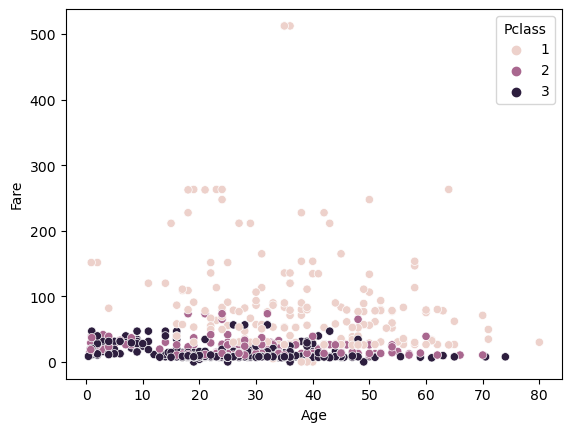

In [42]:
sns.scatterplot(x='Age', y='Fare',data=df,hue='Pclass')

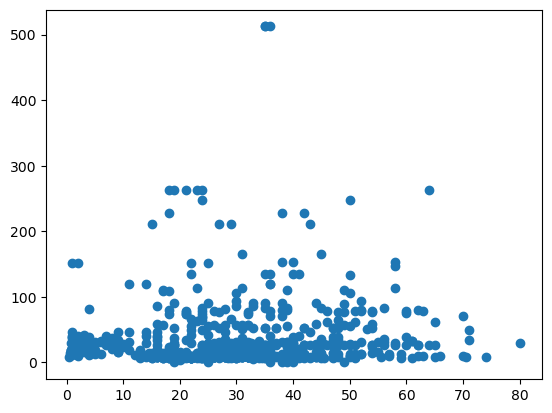

In [43]:
plt.scatter(df['Age'],df['Fare'])

## Categorical vs Categorical

### Contingency/Cross Table

In [47]:
pd.crosstab(df['Pclass'],df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


<Axes: xlabel='Pclass'>

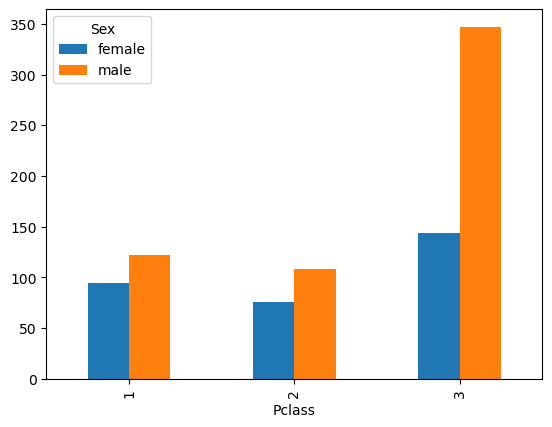

In [48]:
pd.crosstab(df['Pclass'],df['Sex']).plot(kind='bar')

<Axes: xlabel='Sex', ylabel='Pclass'>

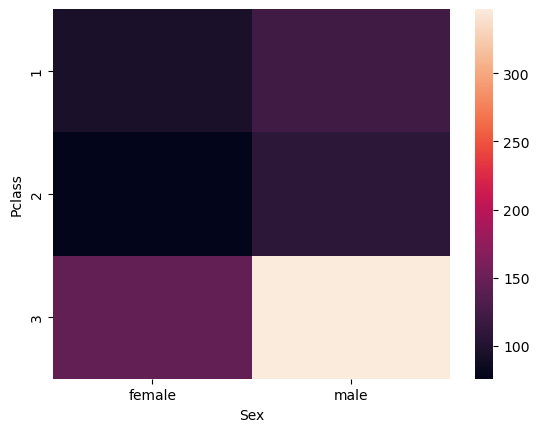

In [49]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Sex']))